In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

np.random.seed(1000)

#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=48, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=56, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer , input_shape=(224*224*1,)
model.add(Dense(1024))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(1024))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(256))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(2, activation='softmax'))

model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 54, 54, 48)        17472     
_________________________________________________________________
activation_44 (Activation)   (None, 54, 54, 48)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 27, 27, 48)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 17, 17, 56)        325304    
_________________________________________________________________
activation_45 (Activation)   (None, 17, 17, 56)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 56)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 6, 6, 128)        

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Project/Data/CNNData/Train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Project/Data/CNNData/Test',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

save_callback = ModelCheckpoint('CNN_Models_AlexNet_save_best_epoch.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min', period=10)

class CustomModelCheckpoint(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # logs is a dictionary
        if epoch % 10 == 0:
          #print(f"epoch: {epoch}, train_acc: {logs['acc']}, valid_acc: {logs['val_acc']}")
          #if logs['val_acc'] > logs['acc']: # your custom condition
          self.model.save('CNN_Models_AlexNet_' + str(epoch) + '_model.h5')

save_per_epoch = CustomModelCheckpoint()

history = model.fit_generator(
        train_generator,
        steps_per_epoch=113,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=13,
        callbacks = [save_callback, save_per_epoch])

Found 3599 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/50





113/113 [==============================] - 1081s 10s/step - loss: 0.4864 - acc: 0.8284 - val_loss: 0.4761 - val_acc: 0.8225
Epoch 2/50
113/113 [==============================] - 53s 468ms/step - loss: 0.4434 - acc: 0.8318 - val_loss: 0.3931 - val_acc: 0.8225
Epoch 3/50
113/113 [==============================] - 59s 522ms/step - loss: 0.3960 - acc: 0.8318 - val_loss: 0.3759 - val_acc: 0.8225
Epoch 4/50
113/113 [==============================] - 59s 526ms/step - loss: 0.3737 - acc: 0.8318 - val_loss: 0.2893 - val_acc: 0.8225
Epoch 5/50
113/113 [==============================] - 59s 525ms/step - loss: 0.3476 - acc: 0.8340 - val_loss: 0.3018 - val_acc: 0.8225
Epoch 6/50
113/113 [==============================] - 60s 534ms/step - loss: 0.3339 - acc: 0.8314 - val_loss: 0.2954 - val_acc: 0.8325
Epoch 7/50
113/113 [==============================] - 61s 536ms/step - loss: 0.2957 - acc: 0.8573 - va

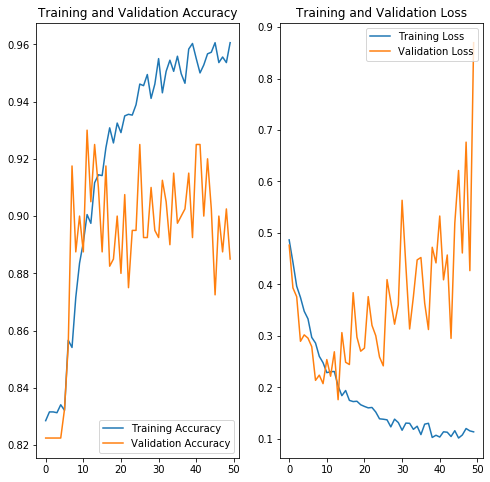

In [ ]:
epochs = 50
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from keras.models import load_model
import cv2
import numpy as np
import os

images = os.listdir('/content/drive/My Drive/Project/Data/CNNData/Test/PointLess')

model1 = load_model('CNN_Models_AlexNet_10_model.h5')

for img_path in images:
  img = cv2.imread('/content/drive/My Drive/Project/Data/CNNData/Test/PointLess/' + img_path)
  img = cv2.resize(img, (224,224))
  img = np.reshape(img, (1,224,224,3))
  classes = model1.predict_classes(img)
  print(classes, img_path)

Using TensorFlow backend.


OSError: ignored